In [1]:
import numpy as np  
import pandas as pd  
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
 

/kaggle/input/fe-course-data/spotify.csv
/kaggle/input/fe-course-data/ames.csv
/kaggle/input/fe-course-data/DataDocumentation.txt
/kaggle/input/fe-course-data/movielens1m.csv
/kaggle/input/fe-course-data/abalone.csv
/kaggle/input/fe-course-data/concrete.csv
/kaggle/input/fe-course-data/autos.csv
/kaggle/input/fe-course-data/accidents.csv
/kaggle/input/fe-course-data/customer.csv
/kaggle/input/fe-course-data/caravan.csv
/kaggle/input/fe-course-data/airbnb.csv
/kaggle/input/fe-course-data/bike-sharing.csv
/kaggle/input/fe-course-data/housing.csv


when first given a dataset, it can have many variables and its possible we have no descriptions for them...

* Feature Utility Metric : Function Measuring associations between a feature and a target ( could use correlation )

* Mutual information measures relationships between two quantities, but it can detect any relationship not just linear ones like correlation does

* Mutual information between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other. if you knew the value of a feature, how much more confident would you be about your target

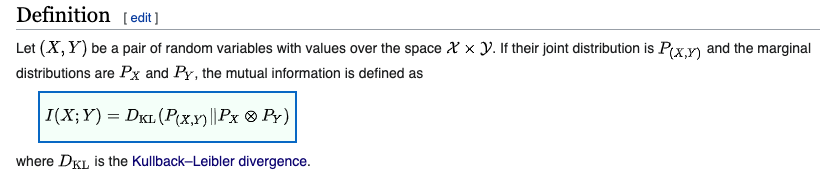

* Where Mutual information for two PDF is defined as

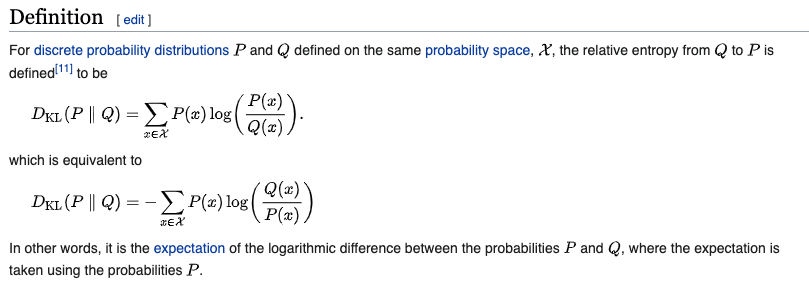

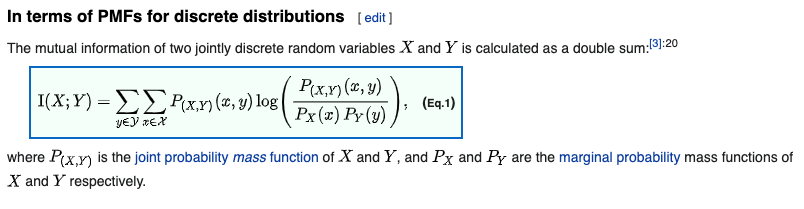

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")

df = pd.read_csv("../input/fe-course-data/autos.csv")
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


* Mutual informaton helps understand the "Relative Potential" of a feature as a predictor of the target, considered by itself
* MI cant detect interactions between features ( its a univariate metric ) - its possible for a feature to be important when it interacts with other features
* Just because a feature has a high MI Score doesnt mean the model will be able to do anything with this information - one may need to transform the feature first to expose the associations

In [3]:
df.columns

Index(['symboling', 'make', 'fuel_type', 'aspiration', 'num_of_doors',
       'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

the SK learn MI tool treats discrete & continious variables differently - we need to tell it which are which.
in this case we will label encode them

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   make               193 non-null    object 
 2   fuel_type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num_of_doors       193 non-null    int64  
 5   body_style         193 non-null    object 
 6   drive_wheels       193 non-null    object 
 7   engine_location    193 non-null    object 
 8   wheel_base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12  curb_weight        193 non-null    int64  
 13  engine_type        193 non-null    object 
 14  num_of_cylinders   193 non-null    int64  
 15  engine_size        193 non-null    int64  
 16  fuel_system        193 non

In [5]:
X = df.copy()
y = X.pop("price")

for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

discrete_features = X.dtypes == int

In [6]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X , y , discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features = discrete_features)
    mi_scores = pd.Series(mi_scores , name = "MI Scores", index = X.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores

mi_scores = make_mi_scores(X , y, discrete_features)
mi_scores[::3]

curb_weight          1.527720
highway_mpg          0.948709
length               0.606973
bore                 0.488846
stroke               0.391008
num_of_cylinders     0.330240
compression_ratio    0.133170
fuel_type            0.048139
Name: MI Scores, dtype: float64

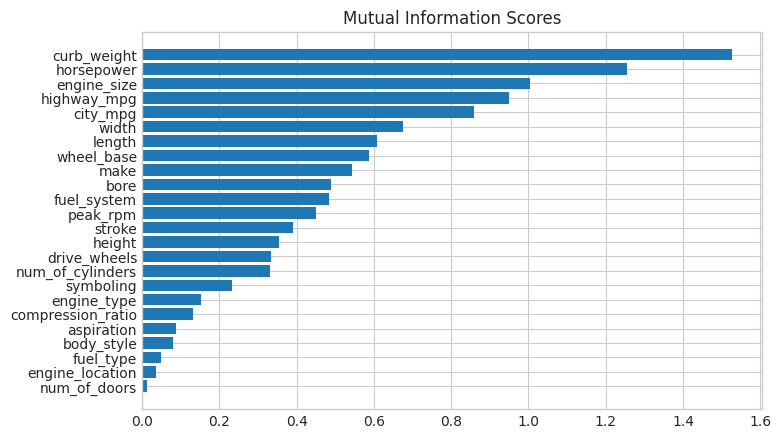

In [7]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending = True )
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
plt.figure(dpi = 100 , figsize = (8, 5))
plot_mi_scores(mi_scores)

the MI scores above show Curb Weight having the largest positive relationship with Price

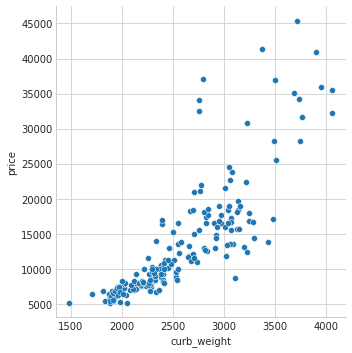

In [8]:
sns.relplot(x = "curb_weight", y = "price", data = df);

* Note Fuel type has a low MI score;
* when plotting we can see it seperates two price populations with different trends within the horsepower feature
* AKA :: Fuel Type contributes an interaction effect and might not be so "unimportant"

* Moral here is that its good to investigate possible interaction effects before designating something as unimportatn -- domanin knowledge always offers some good guidance

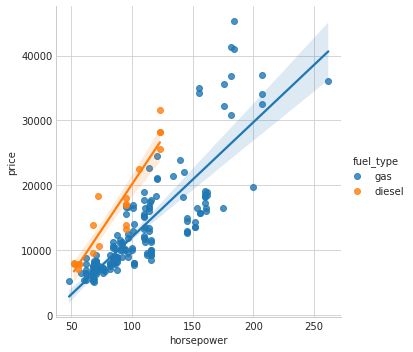

In [9]:
sns.lmplot(x = "horsepower", y = "price", hue = "fuel_type", data = df);

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

plt.style.use("seaborn-whitegrid")

df = pd.read_csv("../input/fe-course-data/housing.csv")
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [11]:
X = df.loc[ : , ["MedInc", "Latitude", "Longitude"]]
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [12]:
kmeans = KMeans( n_clusters = 6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")
X.head()

,MedInc,Latitude,Longitude,Cluster
0,8.3252,37.88,-122.23,4
1,8.3014,37.86,-122.22,4
2,7.2574,37.85,-122.24,4
3,5.6431,37.85,-122.25,4
4,3.8462,37.85,-122.25,1


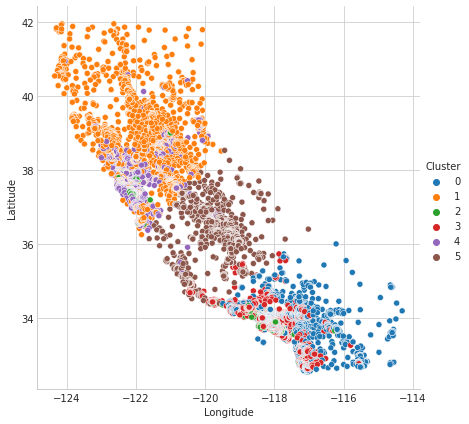

In [13]:
sns.relplot(
    x = "Longitude" , y ="Latitude" , hue = "Cluster" , data = X  , height = 6
);

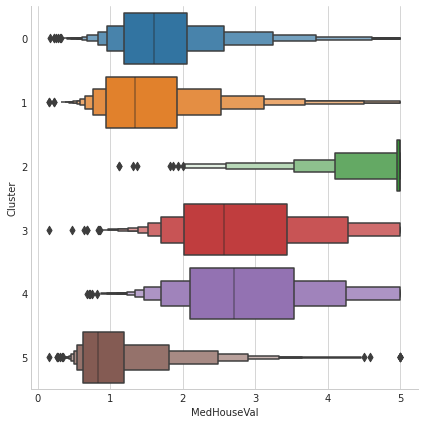

In [14]:
X["MedHouseVal"] = df["MedHouseVal"]
sns.catplot( x = "MedHouseVal" , y = "Cluster" , data = X , kind = "boxen" , height = 6) ; 

In [15]:
df = pd.read_csv("../input/fe-course-data/abalone.csv")
df.columns

Index(['Type', 'LongestShell', 'Diameter', 'Height', 'WholeWeight',
       'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings'],
      dtype='object')